# Python Clustering => K means clustering

## 1. Generating simulated data

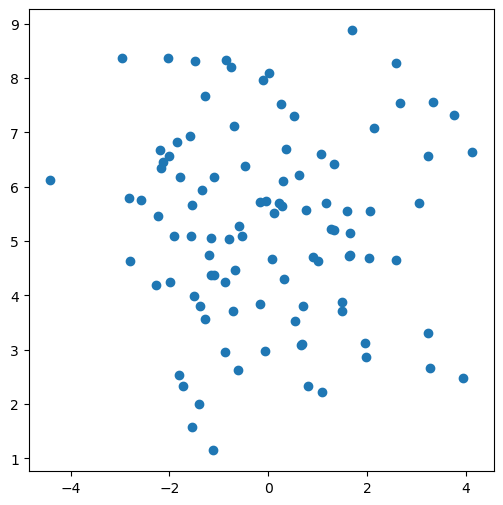

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

mu = np.array([0, 5])
cov = np.array([[3, 0], [0, 3]])
np.random.seed(0)
n = 100
arr2d_x = np.random.multivariate_normal(mu, cov, n)

plt.figure(figsize=(6, 6))
plt.scatter(arr2d_x[:, 0], arr2d_x[:, 1])

## 2. Concatenate to arrays and two 2D arrays

In [4]:
# Concatenate to arrays and two 2D arrays

array_y0 = np.zeros(2)
array_y1 = np.ones(2)
array_y = np.concatenate([array_y0, array_y1])
print(array_y)

arr2d_x0 = np.array([[0, 1], [2, 3]])
arr2d_x1 = np.array([[4, 5], [6, 7]])
arr2d_x = np.concatenate([arr2d_x0, arr2d_x1])
print(arr2d_x)


[0. 0. 1. 1.]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


## 3. Generate data for clustering

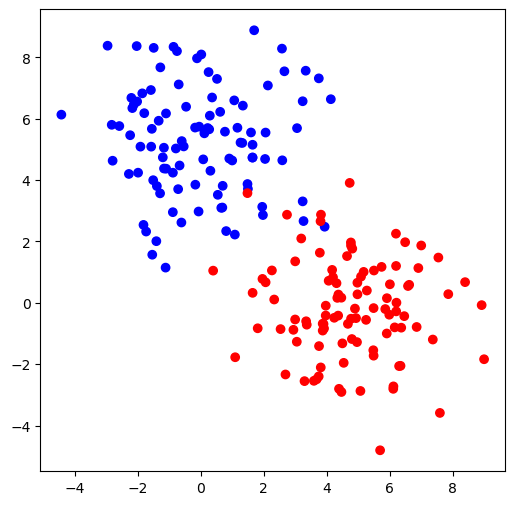

In [5]:
mu0, mu1 = np.array([0, 5]), np.array([5, 0])
cov0 = cov1 = cov
np.random.seed(0)
n0 = n1 = 100
arr2d_x0 = np.random.multivariate_normal(mu0, cov0, n0)
arr2d_x1 = np.random.multivariate_normal(mu1, cov1, n1)
arr2d_x = np.concatenate([arr2d_x0, arr2d_x1])
array_y = np.concatenate([np.zeros(n0), np.ones(n1)])
plt.figure(figsize = (6, 6))
plt.scatter(arr2d_x[:, 0], arr2d_x[:, 1], c=array_y, cmap='bwr')

## 4. K-means clustering with 

[[ 4.82623424 -0.22136359]
 [-0.02717782  5.21862735]]


/Users/y.h.lien/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


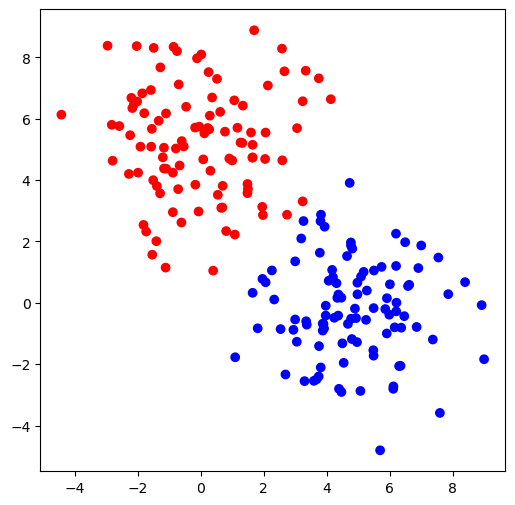

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
km.fit(arr2d_x)

print(km.cluster_centers_)
plt.figure(figsize=(6, 6))
plt.scatter(arr2d_x[:, 0], arr2d_x[:, 1], c=km.labels_, cmap='bwr')

## 5. Mechnaism of k-means clustering

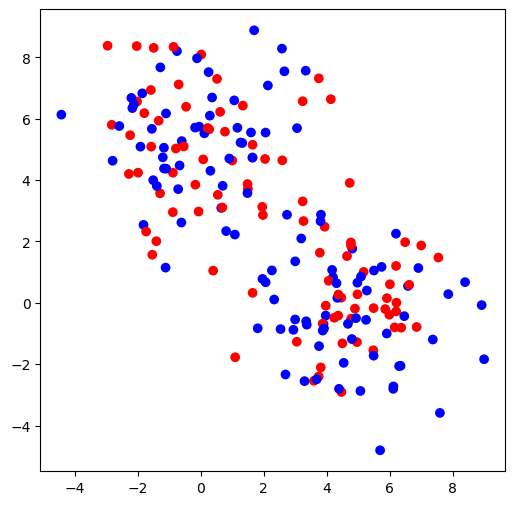

In [9]:
# Step1: Initialize the data

n = n0 + n1

np.random.seed(3)
array_r = np.random.randint(0, 2, n)

plt.figure(figsize = (6, 6))
plt.scatter(arr2d_x[:, 0], arr2d_x[:, 1] ,c= array_r, cmap='bwr')

[2.4509104  2.33195158] [2.28645551 2.75343039]


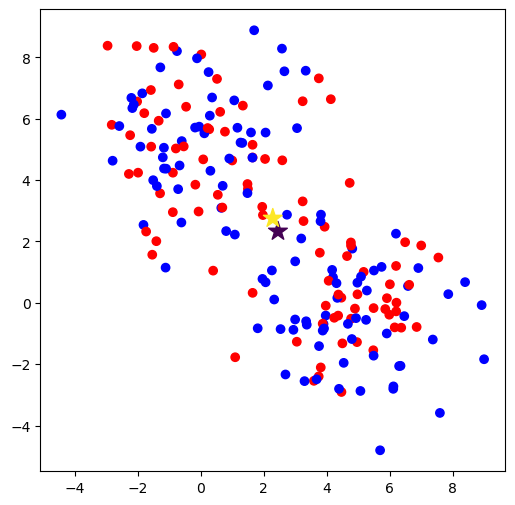

In [10]:
# Step2: Calculation of cluster centers of the original data

list2d_x0hat = [arr2d_x[j] for j in range(n) if array_r[j]==0]
list2d_x1hat = [arr2d_x[j] for j in range(n) if array_r[j]==1]
array_mu0hat = np.mean(list2d_x0hat, axis=0)
array_mu1hat = np.mean(list2d_x1hat, axis=0)
print(array_mu0hat, array_mu1hat)

plt.figure(figsize = (6, 6))
plt.scatter(arr2d_x[:, 0], arr2d_x[:, 1], c=array_r, cmap='bwr')
plt.scatter([array_mu0hat[0], array_mu1hat[0]], [array_mu0hat[1], array_mu1hat[1]], c=[0, 1], marker='*', s=200)

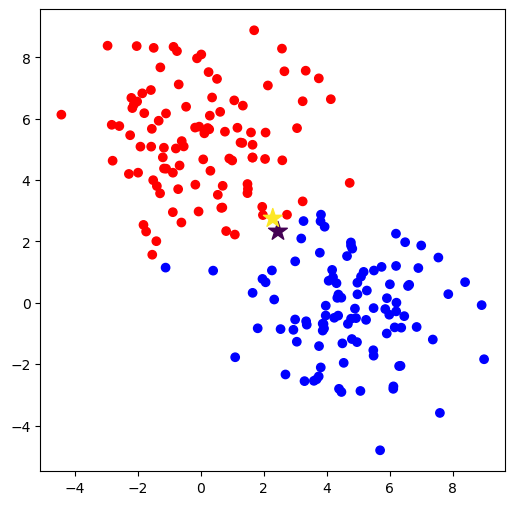

In [13]:
# Step3: Assignment to new clusters

for j in range(n):
    if sum((array_mu0hat - arr2d_x[j])**2) < sum((array_mu1hat - arr2d_x[j])**2):
        array_r[j] = 0
    else:
        array_r[j] = 1
        
plt.figure(figsize=(6, 6))
plt.scatter(arr2d_x[:, 0], arr2d_x[:, 1], c=array_r, cmap='bwr')
plt.scatter([array_mu0hat[0],array_mu1hat[0]], 
            [array_mu0hat[1], array_mu1hat[1]], c=[0, 1], marker="*", s=200)

## 6. Exercise

5, 6
2, 2


/Users/y.h.lien/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


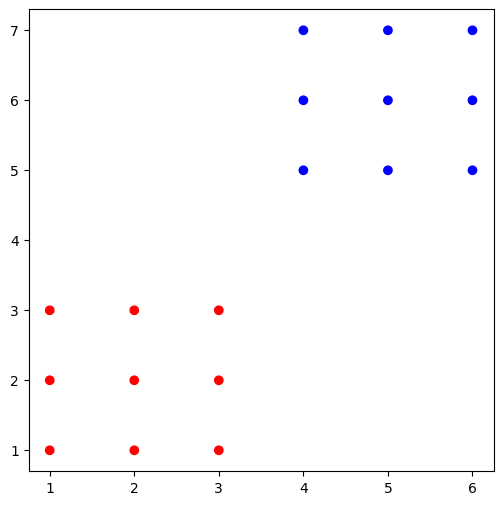

In [16]:
%matplotlib inline
from appscript import k
import numpy as np
import matplotlib.pyplot as plt
from pyparsing import delimited_list
from sklearn.cluster import KMeans

arr2d_x = np.loadtxt(fname="cluster.csv", delimiter=",")
lm = KMeans(n_clusters=2, random_state=0)
km.fit(arr2d_x)

print('{0:.0f}, {1:.0f}'.format(km.cluster_centers_[0, 0], km.cluster_centers_[0, 1]))
print('{0:.0f}, {1:.0f}'.format(km.cluster_centers_[1, 0], km.cluster_centers_[1, 1]))

plt.figure(figsize=(6, 6))
plt.scatter(arr2d_x[:, 0], arr2d_x[:, 1], c=km.labels_, cmap="bwr")